In [13]:
import random
import matplotlib.pyplot as plt


locations = [(1, 5), (2, 3), (4, 8), (6, 1), (7, 4), (8, 2), (9, 1), (4, 5), (20, 40), (10, 10)]
cars = 2 #amount of required subsets
generations = 50
depot = (0, 0)
population_size = 10



In [14]:
# Problem: Traveling Salesman Problem
    

def create_individual(n_cars):
    """
    Creates a random individual for the Traveling Salesman Problem.
    
    Returns:
    list: A permutation of city indices representing a tour.
    """
    # TODO: IMPLEMENT VARIABLE SIZE SUBSETS FOR CARS
    def split(a, n):
        k, m = divmod(len(a), n)
        return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

    
    return list(split(random.sample(range(len(locations)), len(locations)), n_cars))

def fitness(individual):
    """
    Calculates the fitness of an individual.
    
    The fitness is the inverse of the total distance of the tour.
    Shorter tours have higher fitness values.
    
    Args:
    individual (list): A permutation of city indices representing a tour.
    
    Returns:
    float: The inverse of the total distance of the tour.
    """
    total_distance = sum(
        ((locations[individual[i]][0] - locations[individual[i-1]][0])**2 + 
         (locations[individual[i]][1] - locations[individual[i-1]][1])**2)**0.5
        for i in range(len(individual))
    )
    return 1 / total_distance

def fitness(individuals):
    """
    """
    subset_distances = []
    for subset in individuals:
        distance_indiv = sum(
        ((locations[subset[i]][0] - locations[subset[i-1]][0])**2 + 
         (locations[subset[i]][1] - locations[subset[i-1]][1])**2)**0.5
        for i in range(len(subset))
    )
    subset_distances.append(distance_indiv)
    return 1 / sum(subset_distances)
def crossover(parent1, parent2):
    """
    Performs Order Crossover (OX) between two parents.
    
    Args:
    parent1 (list): First parent's tour.
    parent2 (list): Second parent's tour.
    
    Returns:
    tuple: A tuple containing:
           - The child resulting from the crossover (list)
           - The start and end indices of the crossover section (tuple)
    """
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [-1] * len(parent1)
    child[start:end] = parent1[start:end]
    pointer = end
    for location in parent2:
        if location not in child:
            child[pointer] = location
            pointer = (pointer + 1) % len(child)
    return child, (start, end)

def mutate(individual, mutation_rate=0.1):
    """
    Mutates an individual by swapping two cities.
    
    Args:
    individual (list): The tour to mutate.
    
    Returns:
    list: The mutated tour.
    """
    if random.random() < mutation_rate:  # 10% mutation rate for demonstration
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

def tournament_selection(individuals ,k=3, p=1):
        contestants = random.sample(individuals, k)
        contestant_fitness = []
        for contestant in contestants:
            contestant_fitness.append(fitness(contestant))
        return contestants[contestant_fitness.index(max(contestant_fitness))]

def visualize_individual(individual, fitness_value):
    """
    Creates a string representation of an individual.
    
    Args:
    individual (list): A tour represented as a list of city indices.
    fitness_value (float): The fitness value of the individual.
    
    Returns:
    str: A string representation of the tour and its fitness.
    """
    routes = []
    for subset in individual:
        route = " -> ".join(map(str, subset))
        routes.append(route)
    return f"{routes} Fitness: {fitness_value:.6f}"

def genetic_algorithm():
    """
    Runs the genetic algorithm for the Traveling Salesman Problem.
    
    This function initializes a population, evolves it over several generations,
    and prints the state of the population at each step.
    """
    population = [create_individual(cars) for _ in range(population_size)]
    
    for generation in range(generations):
        print(f"\nGeneration {generation}:")
        for i, ind in enumerate(population):
            print(f"Individual {i}: {visualize_individual(ind, fitness(ind))}")
        
        new_population = []
        
        print("\nCrossover and Mutation:")
        for i in range(0, population_size, 2):
            parent1 = tournament_selection(population)
            parent1, parent2 = random.sample(population, 2)
            child1, (start, end) = crossover(parent1, parent2)
            child2, _ = crossover(parent2, parent1)
            
            print(f"\nParent 1: {visualize_individual(parent1, fitness(parent1))}")
            print(f"Parent 2: {visualize_individual(parent2, fitness(parent2))}")
            print(f"Crossover range: {start} to {end}")
            print(f"Child 1:  {visualize_individual(child1, fitness(child1))}")
            
            mutated_child1 = mutate(child1)
            print(f"Mutated: {visualize_individual(mutated_child1, fitness(mutated_child1))}")
            
            new_population.extend([mutated_child1, mutate(child2)])
        
        population = new_population
    
    print("\nFinal Population:")
    for i, ind in enumerate(population):
        print(f"Individual {i}: {visualize_individual(ind, fitness(ind))}")

if __name__ == "__main__":
    genetic_algorithm()




Generation 0:
Individual 0: ['8 -> 4 -> 0 -> 3 -> 1', '5 -> 6 -> 9 -> 2 -> 7'] Fitness: 0.040332
Individual 1: ['8 -> 6 -> 9 -> 1 -> 3', '7 -> 0 -> 5 -> 2 -> 4'] Fitness: 0.038478
Individual 2: ['7 -> 6 -> 0 -> 3 -> 1', '8 -> 9 -> 5 -> 2 -> 4'] Fitness: 0.011067
Individual 3: ['1 -> 0 -> 2 -> 5 -> 8', '6 -> 9 -> 7 -> 3 -> 4'] Fitness: 0.035580
Individual 4: ['9 -> 3 -> 5 -> 1 -> 4', '7 -> 2 -> 6 -> 0 -> 8'] Fitness: 0.010116
Individual 5: ['9 -> 4 -> 5 -> 1 -> 0', '8 -> 3 -> 7 -> 6 -> 2'] Fitness: 0.010342
Individual 6: ['5 -> 2 -> 1 -> 4 -> 8', '7 -> 0 -> 6 -> 9 -> 3'] Fitness: 0.028312
Individual 7: ['8 -> 2 -> 4 -> 1 -> 6', '5 -> 0 -> 9 -> 7 -> 3'] Fitness: 0.030836
Individual 8: ['7 -> 2 -> 4 -> 3 -> 0', '1 -> 5 -> 8 -> 9 -> 6'] Fitness: 0.010651
Individual 9: ['1 -> 0 -> 6 -> 4 -> 9', '8 -> 2 -> 5 -> 3 -> 7'] Fitness: 0.011340

Crossover and Mutation:

Parent 1: ['8 -> 2 -> 4 -> 1 -> 6', '5 -> 0 -> 9 -> 7 -> 3'] Fitness: 0.030836
Parent 2: ['7 -> 2 -> 4 -> 3 -> 0', '1 -> 5 -> 8 -


Generation 0:
Individual 0: ['6 -> 0 -> 2 -> 8 -> 7', '1 -> 4 -> 3 -> 9 -> 5'] Fitness: 0.030827
Individual 1: ['1 -> 7 -> 2 -> 9 -> 3', '6 -> 8 -> 5 -> 0 -> 4'] Fitness: 0.010238
Individual 2: ['9 -> 8 -> 0 -> 4 -> 3', '7 -> 6 -> 5 -> 2 -> 1'] Fitness: 0.043025
Individual 3: ['1 -> 4 -> 0 -> 3 -> 5', '8 -> 6 -> 9 -> 2 -> 7'] Fitness: 0.010268
Individual 4: ['8 -> 2 -> 7 -> 3 -> 6', '9 -> 4 -> 5 -> 1 -> 0'] Fitness: 0.036286
Individual 5: ['1 -> 0 -> 7 -> 8 -> 4', '9 -> 5 -> 2 -> 6 -> 3'] Fitness: 0.027094
Individual 6: ['8 -> 1 -> 4 -> 5 -> 3', '7 -> 2 -> 0 -> 6 -> 9'] Fitness: 0.030255
Individual 7: ['4 -> 3 -> 1 -> 7 -> 5', '9 -> 8 -> 0 -> 6 -> 2'] Fitness: 0.010491
Individual 8: ['9 -> 7 -> 4 -> 0 -> 6', '2 -> 5 -> 3 -> 8 -> 1'] Fitness: 0.010265
Individual 9: ['8 -> 5 -> 6 -> 2 -> 9', '3 -> 1 -> 7 -> 0 -> 4'] Fitness: 0.051162

Crossover and Mutation:

Parent 1: ['1 -> 0 -> 7 -> 8 -> 4', '9 -> 5 -> 2 -> 6 -> 3'] Fitness: 0.027094
Parent 2: ['1 -> 4 -> 0 -> 3 -> 5', '8 -> 6 -> 9 -

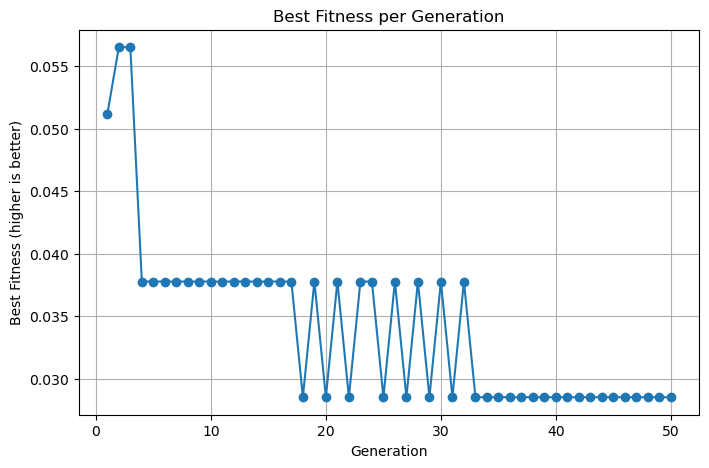

In [15]:

# Modify the genetic_algorithm function to track best fitness per generation
def genetic_algorithm_with_tracking():
    population = [create_individual(cars) for _ in range(population_size)]
    best_fitness_per_gen = []
    
    for generation in range(generations):
        print(f"\nGeneration {generation}:")
        fitnesses = [fitness(ind) for ind in population]
        for i, ind in enumerate(population):
            print(f"Individual {i}: {visualize_individual(ind, fitness(ind))}")
        
        best_fitness = max(fitnesses)
        best_fitness_per_gen.append(best_fitness)
        
        new_population = []
        
        print("\nCrossover and Mutation:")
        for i in range(0, population_size, 2):
            parent1, parent2 = random.sample(population, 2)
            child1, (start, end) = crossover(parent1, parent2)
            child2, _ = crossover(parent2, parent1)
            
            print(f"\nParent 1: {visualize_individual(parent1, fitness(parent1))}")
            print(f"Parent 2: {visualize_individual(parent2, fitness(parent2))}")
            print(f"Crossover range: {start} to {end}")
            print(f"Child 1:  {visualize_individual(child1, fitness(child1))}")
            
            mutated_child1 = mutate(child1)
            print(f"Mutated: {visualize_individual(mutated_child1, fitness(mutated_child1))}")
            
            new_population.extend([mutated_child1, mutate(child2)])
        
        population = new_population
    
    print("\nFinal Population:")
    for i, ind in enumerate(population):
        print(f"Individual {i}: {visualize_individual(ind, fitness(ind))}")
    
    return best_fitness_per_gen

# Run the new genetic algorithm and plot the best fitness per generation
best_fitness_per_gen = genetic_algorithm_with_tracking()
plt.figure(figsize=(8, 5))
plt.plot(range(1, generations+1), best_fitness_per_gen, marker='o')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (higher is better)')
plt.title('Best Fitness per Generation')
plt.grid(True)
plt.show()


In [16]:
create_individual(cars)

[[9, 7, 6, 3, 8], [5, 4, 2, 1, 0]]